In [625]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

In [626]:
files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

['../BL_Work/openPrescribe/serialized/201009.gz', '../BL_Work/openPrescribe/serialized/201008.gz', '../BL_Work/openPrescribe/serialized/201011.gz', '../BL_Work/openPrescribe/serialized/201010.gz', '../BL_Work/openPrescribe/serialized/201012.gz']


In [627]:
pdp = pd.read_csv(files[0])

In [628]:
patients = pd.read_csv('../BL_Work/grondTruths/GP_SYOA.csv')

In [629]:
practice_patient_dict = {}
for index , row in patients.iterrows():
    practice_patient_dict[row['PRACTICE_CODE']] = row['Total_All']

In [630]:
%store -r presc_Disease_prevalence
# %store -r presc_Symptom_prevalence
%store -r GP_postcodes

In [631]:
# presc_Disease_prevalence = presc_Symptom_prevalence.copy()

In [632]:
presc_Disease_prevalence['201009'].keys()

[u'psoriasis',
 u'chronic fatigue syndrome',
 u'kidney stones',
 u"Meniere's disease",
 u"crohn's disease",
 u'gastroparesis',
 u'irritable bowel syndrome',
 u'parkinsons',
 u'multiple sclerosis',
 u'sleep apnea',
 u'interstitial cystitis',
 u'bipolar',
 u'dementia',
 u'hypothyroidism',
 u'dysautonomia',
 u'rheumatoid',
 u'depression',
 u'diabetes']

In [633]:
%store  -r compre_postCode_dict
compre_postCode_dict

{'Adur': {'areaId': ['E07000223'],
  'postcodes': ['BN41', 'BN15', 'BN14', 'BN42', 'BN43']},
 'Allerdale': {'areaId': ['E07000026'],
  'postcodes': ['CA13', 'CA15', 'CA14', 'CA7', 'CA12', 'CA5']},
 'Amber Valley': {'areaId': ['E07000032'],
  'postcodes': ['DE4',
   'DE22',
   'DE21',
   'DE5',
   'NG16',
   'DE6',
   'DE56',
   'DE55',
   'DE75',
   'DE7']},
 'Arun': {'areaId': ['E07000224'],
  'postcodes': ['BN18',
   'BN17',
   'BN16',
   'BN13',
   'BN12',
   'PO21',
   'PO18',
   'PO20',
   'PO22']},
 'Ashfield': {'areaId': ['E07000170'],
  'postcodes': ['NG17', 'NG6', 'NG15', 'NG18', 'NG19']},
 'Ashford': {'areaId': ['E07000105'],
  'postcodes': ['CT4',
   'TN30',
   'TN17',
   'TN18',
   'ME13',
   'ME17',
   'TN23',
   'TN24',
   'TN25',
   'TN26',
   'TN27']},
 'Aylesbury Vale': {'areaId': ['E07000004'],
  'postcodes': ['HP19',
   'HP18',
   'HP17',
   'HP16',
   'MK19',
   'MK18',
   'OX9',
   'OX5',
   'MK17',
   'HP4',
   'OX33',
   'OX27',
   'HP22',
   'HP23',
   'HP20',
 

In [634]:
disease_GP_level = presc_Disease_prevalence['201009']['diabetes']

In [635]:
Area_values

{u'Adur': {'patients': 133765.0, 'population': 61929},
 u'Allerdale': {'patients': 108473.0, 'population': 96268},
 u'Amber Valley': {'patients': 386927.0, 'population': 122746},
 u'Arun': {'patients': 213991.0, 'population': 150877},
 u'Ashfield': {'patients': 252315.0, 'population': 120131},
 u'Ashford': {'patients': 243080.0, 'population': 120116},
 u'Aylesbury Vale': {'patients': 481973.0, 'population': 176867},
 u'Babergh': {'patients': 168634.0, 'population': 87917},
 u'Barking and Dagenham': {'patients': 277996.0, 'population': 190560},
 u'Barnet': {'patients': 723280.0, 'population': 363956},
 u'Barnsley': {'patients': 427077.0, 'population': 233671},
 u'Barrow-in-Furness': {'patients': 92644.0, 'population': 68446},
 u'Basildon': {'patients': 291740.0, 'population': 176474},
 u'Basingstoke and Deane': {'patients': 333885.0, 'population': 170492},
 u'Bassetlaw': {'patients': 234610.0, 'population': 112248},
 u'Bath and North East Somerset': {'patients': 264739.0, 'population': 

In [636]:
groundTruth = pd.read_csv('../BL_Work/prevalence/DM.csv')

In [637]:
gt = []
presc = []
for index , row in groundTruth.iterrows():
    if row['practice_code'] in disease_GP_level:
        predict = disease_GP_level[row['practice_code'] ]
        if not np.isnan(predict):                          
            gt.append(row['disease_prevalence'])
            presc.append(predict)

In [638]:
pearsonr(gt,presc)

(0.2828581051545892, 7.154477499426506e-134)

In [639]:
postCodeDict = compre_postCode_dict

In [640]:
store -r Area_values

In [641]:
area_patients = {}
for k in GP_postcodes:
    postCode = GP_postcodes[k]
    for area in postCodeDict:
        if postCode in postCodeDict[area]['postcodes']:
            try:
                if area not in area_patients:
                    area_patients[area] = practice_patient_dict[k]
                else:
                    area_patients[area] += practice_patient_dict[k]
            except:
                continue

area_patients_filtered = {k: area_patients[k] for k in area_patients if not np.isnan(area_patients[k] )}

In [656]:
# %store area_patients_filtered

Stored 'area_patients_filtered' (dict)


In [642]:
filt1 = list(set(disease_GP_level.keys()).intersection(practice_patient_dict.keys()))
filteredGPs = list(set(groundTruth['practice_code']).intersection(filt1))
len(filteredGPs)

7273

In [643]:
IMDs = json.load(open('District_IMD_scores_life_values.json','rb'))

In [644]:
IMDs

{u'Adur': {u'District Code': [u'E07000223'],
  u'IMD': {u'mean_values': {u'Barriers to Housing and Services Score': 17.706571428571433,
    u'Crime Score': -0.1049047619047619,
    u'Education, Skills and Training Score': 28.01047619047619,
    u'Employment Score (rate)': 0.10511904761904763,
    u'Health Deprivation and Disability Score': -0.005071428571428567,
    u'Income Score (rate)': 0.12354761904761905,
    u'Living Environment Score': 18.868476190476194},
   u'median_values': {u'Barriers to Housing and Services Score': 17.7195,
    u'Crime Score': 0.030500000000000003,
    u'Education, Skills and Training Score': 26.0565,
    u'Employment Score (rate)': 0.086,
    u'Health Deprivation and Disability Score': -0.0365,
    u'Income Score (rate)': 0.10250000000000001,
    u'Living Environment Score': 17.901}},
  u'Life Values': {u'Anxiety': -1,
   u'Happiness': -1,
   u'Life Satisfaction': 56.42,
   u'Worthwhile': 45.7},
  u'aggregate_IMD': 18.275,
  u'pop_density': 1466.0302032741

In [645]:
store -r lon_boro

In [646]:
subKeys = set(area_patients_filtered.keys()).intersection(lon_boro)

In [647]:
Area_GP_prevalence = {}
Area_GP_gt = {}
for k in filteredGPs:
    postCode = GP_postcodes[k]
#     for area in area_patients_filtered:
    for area in subKeys:
        if area not in Area_GP_prevalence:
            Area_GP_prevalence[area] = {}
            Area_GP_gt[area] = {}
        if postCode in postCodeDict[area]['postcodes']:
            if not np.isnan(disease_GP_level[k]) and k in practice_patient_dict:
                Area_GP_prevalence[area][k] = disease_GP_level[k]
                Area_GP_gt[area][k] = gt_GP[k]
                

In [648]:
gt_GP = {}
for index , row in groundTruth.iterrows():
    if row['practice_code'] in filteredGPs:
        gt_GP[row['practice_code']] = row['disease_prevalence']

In [649]:
def getGPCorrArea(Area, Area_GP_prevalence,Area_GP_gt):
    area_p = Area_GP_prevalence[Area]
    area_gt = Area_GP_gt[Area]
    pred = []
    gt = []
    for k in area_p:
        pred.append(area_p[k])
        gt.append(area_gt[k])
    corr = pearsonr(pred, gt)
    return corr[0]
    

In [650]:
pop = []
patient_rate = []
corrs = []
names = []
GPs = []
health = []
total_score = []
income = []
Employment = []
housing = []
crime = []
Life_Satisfaction = []
education = []
pop_density = []
env_score = []
happiness = []
senior = []
for area in Area_GP_prevalence:
    if area in Area_values:
        if not np.isnan(getGPCorrArea(area, Area_GP_prevalence , Area_GP_gt)):
            pop.append(np.log10(Area_values[area]['population']+1))
            patient_rate.append((float(Area_values[area]['patients'])/float(Area_values[area]['population']+1)))
#             patient_rate.append(float(Area_values[area]['patients']))
            corrs.append(getGPCorrArea(area, Area_GP_prevalence , Area_GP_gt))
            names.append(area)
            GPs.append(len(Area_GP_prevalence[area]))
            total_score.append(IMDs[area]['aggregate_IMD'])
            pop_density.append(IMDs[area]['pop_density'])
            health.append(IMDs[area]['IMD']['median_values']['Health Deprivation and Disability Score'])
            income.append(IMDs[area]['IMD']['median_values']['Income Score (rate)'])
            education.append(IMDs[area]['IMD']['median_values']['Education, Skills and Training Score'])
            crime.append(IMDs[area]['IMD']['median_values']['Crime Score'])
            happiness.append(IMDs[area]['Life Values']['Life Satisfaction'])
            env_score.append(IMDs[area]['IMD']['median_values']['Living Environment Score'])
            senior.append(IMDs[area]['senior_pop'])

In [651]:
# feats = np.stack([corrs,patient_rate,pop,pop_density,GPs,health,total_score,income,education,crime,happiness],axis=1)

# feats.shape

# from utils import ols
# from sklearn import preprocessing
# normed_feats = preprocessing.normalize(feats)
# y = normed_feats[:,0]
# x = normed_feats[:,1:]
# mymodel = ols.ols(y,x,'Corrs',['patient_rate','pop','pop_density','GPs','health','IMD_score','income','education','crime','happiness'])

In [652]:
# mymodel.summary()

# mymodel.estimate()

# mymodel.summary()

In [653]:
def label_point(x, y, val, ax ):
    a = pd.concat({'x': pd.Series(x), 'y':  pd.Series(y), 'val': pd.Series(val)}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

def filterHighestResiduals(gt,predict,names , topK):
    slope, intercept, r_value, p_value, std_err = linregress(predict,gt)
    predicted = [(slope*k)+intercept for k in gt]
    residuals = [abs(v1 - v2) for (v1,v2) in zip(predicted,predict)]
    topKidx = np.argsort(residuals)[-topK:][::-1]
    return [gt[i] for i in topKidx] , [predict[i] for i in topKidx], [names[i] for i in topKidx]

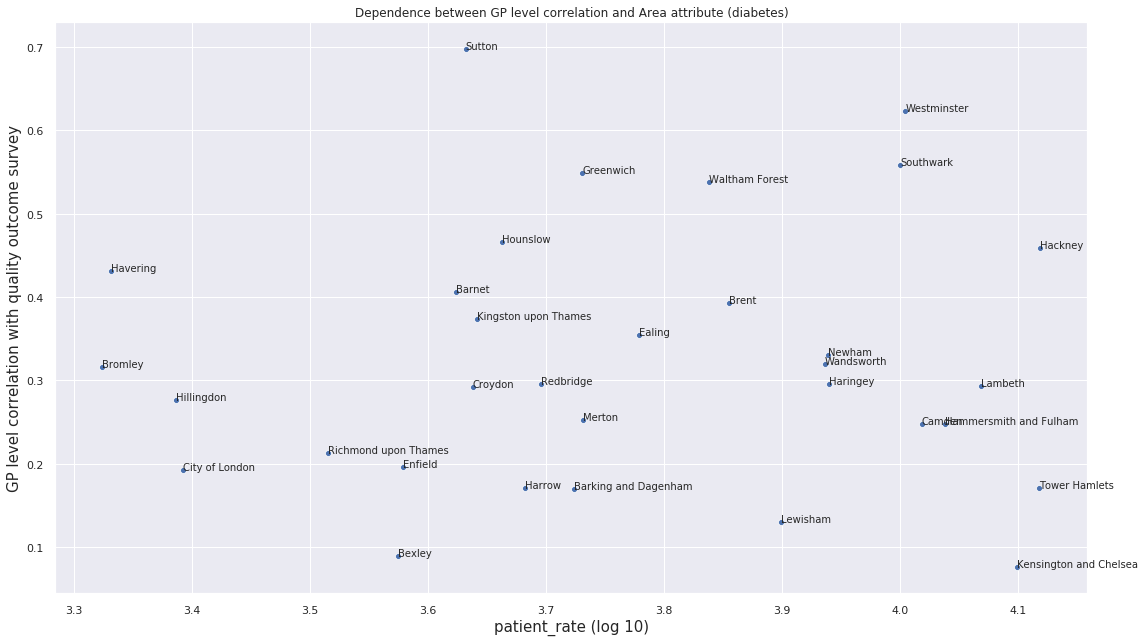

In [654]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
x = sns.scatterplot(x=np.log10(pop_density), y=corrs)
ax = plt.gca()
label_point(np.log10(pop_density) , corrs , names , ax)
ax.set_title("Dependence between GP level correlation and Area attribute (diabetes)")
ax.set_xlabel("patient_rate (log 10)",fontsize = 15)
ax.set_ylabel("GP level correlation with quality outcome survey", fontsize = 15)

In [655]:
corr = pearsonr(corrs,np.log10(pop_density))
print corr

(0.03417062946445845, 0.8527100562292855)


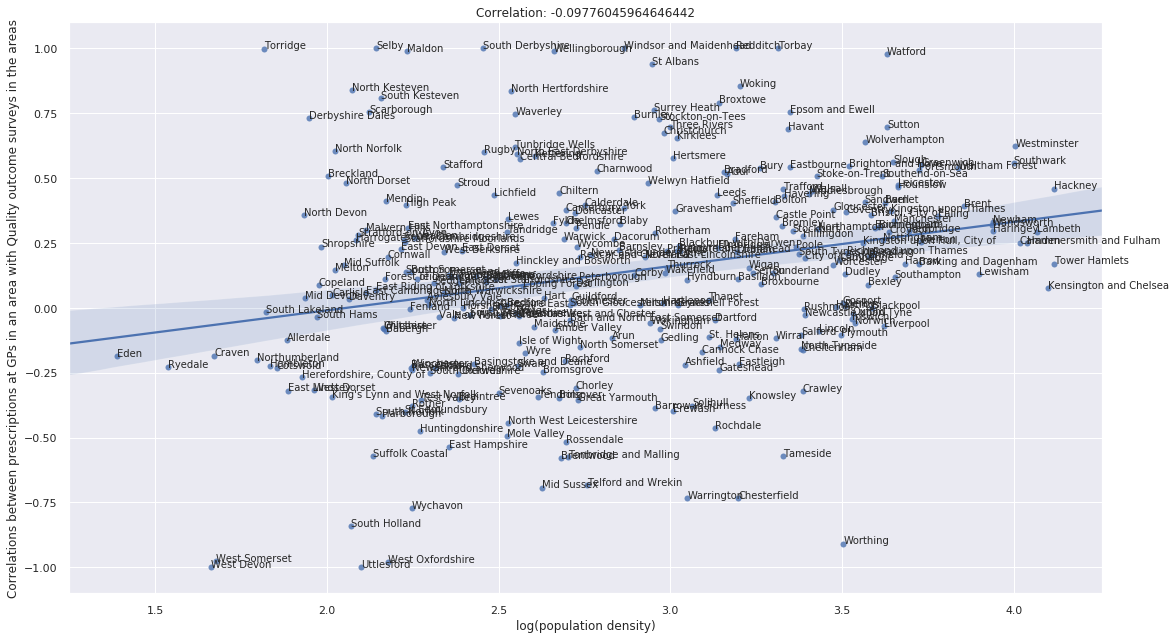

In [597]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x=np.log10(pop_density) , y = corrs)
ax = plt.gca()
# gt_ , predict_ , names_ = filterHighestResiduals(gt, predict , names, 10)
label_point(np.log10(pop_density) , corrs , names , ax)
ax.set_title("Correlation: " + str(corr[0]) )
ax.set_xlabel("log(population density)",fontsize = 12)
ax.set_ylabel("Correlations between prescriptions at GPs in an area with Quality outcome surveys in the areas",fontsize = 12)

In [598]:
# disease_GP_level = presc_Disease_prevalence['201009']['depression']
# area_prevalence = {}
# GP_Disease_cases = {}
# GP_registerd_patients = {}
# GP_patients_per_GP = {}
# for k in filteredGPs:
#     postCode = GP_postcodes[k]
#     for area in area_patients_filtered:
#         if area not in area_prevalence:
#             area_prevalence[area]= {}
#             area_prevalence[area]['GP'] = []
#             GP_Disease_cases[area] = []
#             GP_registerd_patients[area] = []
#         if postCode in postCodeDict[area]['postcodes']:
#             if not np.isnan(disease_GP_level[k]) and k in practice_patient_dict:
#                 area_prevalence[area]['GP'].append(float(disease_GP_level[k])*float(practice_patient_dict[k]))
# #                 area_prevalence[area]['GP'].append(float(disease_GP_level[k][0]))
#                 GP_Disease_cases[area].append(disease_GP_level[k])
#                 GP_registerd_patients[area].append(practice_patient_dict[k])
# for area in area_prevalence:
#     area_prevalence[area]['norm'] = float(np.sum(area_prevalence[area]['GP']))/float(area_patients_filtered[area]+1)
# #     area_prevalence[area]['norm'] = float(np.mean(area_prevalence[area]['GP']))
#     GP_patients_per_GP[area] =  float(area_patients_filtered[area])/len(area_prevalence[area]['GP'])
        

In [599]:
prevalence_GP_all = {}
for month in presc_Disease_prevalence:
    prevalence_GP_all[month] = {}
    for disease in presc_Disease_prevalence[month]:
        prevalence_GP_all[month][disease] = {}
        disease_GP_level = presc_Disease_prevalence[month][disease]
        area_prevalence = {}
        GP_Disease_cases = {}
        GP_registerd_patients = {}
        GP_patients_per_GP = {}
        for k in filteredGPs:
            postCode = GP_postcodes[k]
            for area in area_patients_filtered:
                if area not in area_prevalence:
                    area_prevalence[area]= {}
                    area_prevalence[area]['GP'] = []
                    GP_Disease_cases[area] = []
                    GP_registerd_patients[area] = []
                if postCode in postCodeDict[area]['postcodes']:
                    if not np.isnan(disease_GP_level[k]) and k in practice_patient_dict:
                        area_prevalence[area]['GP'].append(float(disease_GP_level[k])*float(practice_patient_dict[k]))
                        GP_Disease_cases[area].append(disease_GP_level[k])
                        GP_registerd_patients[area].append(practice_patient_dict[k])
        for area in area_prevalence:
            area_prevalence[area]['norm'] = float(np.sum(area_prevalence[area]['GP']))/float(area_patients_filtered[area]+1)
        #     area_prevalence[area]['norm'] = float(np.mean(area_prevalence[area]['GP']))
            GP_patients_per_GP[area] =  float(area_patients_filtered[area])/len(area_prevalence[area]['GP'])
        
        for area in area_prevalence:
            if area not in prevalence_GP_all[month][disease]:
                prevalence_GP_all[month][disease][area] = []
            prevalence_GP_all[month][disease][area].append(area_prevalence[area]['norm']) 


In [600]:
prevalence_GP_all

{'201009': {u"Meniere's disease": {'Adur': [0.0005474593158454402],
   'Allerdale': [0.00058553079528852],
   'Amber Valley': [0.0006384638068951099],
   'Arun': [0.0004560572730107216],
   'Ashfield': [0.0005658236763376363],
   'Ashford': [0.0005671141429122795],
   'Aylesbury Vale': [0.0005473282015691413],
   'Babergh': [0.0005652515599834215],
   'Barking and Dagenham': [0.000595935352399546],
   'Barnet': [0.0005961079037038282],
   'Barnsley': [0.0005947283342077966],
   'Barrow-in-Furness': [0.0005188552699371802],
   'Basildon': [0.0006104488031016417],
   'Basingstoke and Deane': [0.0005735637776999259],
   'Bassetlaw': [0.0005390402409519356],
   'Bath and North East Somerset': [0.000525813683702686],
   'Bedford': [0.000561766163412678],
   'Bexley': [0.0005721725738752184],
   'Birmingham': [0.0006128159227531287],
   'Blaby': [0.0005087583777919565],
   'Blackburn with Darwen': [0.0006417736049021972],
   'Blackpool': [0.0005472859736863588],
   'Bolsover': [0.00067304918

In [601]:
# with open('Disease_Prevalence_V3.json','wb') as f:
#     json.dump(prevalence_GP_all,f)

In [602]:
# with open('Symptom_Prevalence_V3.json','wb') as f:
#     json.dump(prevalence_GP_all,f)

In [603]:
# Area_predict = {k : area_prevalence[k]['norm'] for k in area_prevalence}
Area_predict = prevalence_GP_all['201009']['diabetes']

In [604]:
Area_Gt = pd.read_csv('../BL_Work/prevalence_LA_level/DM_GP_to_LA_level.csv')

In [605]:
Area_Gt.head()

,Unnamed: 0,Area,weighted_mean
0,0,Mendip,0.062529
1,1,Windsor and Maidenhead,0.050418
2,2,Hambleton,0.062369
3,3,Ipswich,0.059735
4,4,Castle Point,0.068715


In [606]:
# predicted = area_prevalence['201009']['depression']
predicted = Area_predict

In [607]:
%store -r lon_boro

In [608]:
common_keys = set(Area_Gt['Area']).intersection(predicted.keys()).intersection(lon_boro)
# common_keys = set(Area_Gt['Area']).intersection(predicted.keys())

In [609]:
predict = []
gt = []
names = []
for index, row in Area_Gt.iterrows():
    if row['Area'].strip() in common_keys:
#         predict.append(predicted[row['Area']])
        predict.append(predicted[row['Area']][0])
        names.append(row['Area'].strip())
        gt.append(row['weighted_mean'])

In [610]:
corr = pearsonr(predict,gt)
print corr

(0.5288860782316283, 0.0018574948214185969)


In [548]:
def label_point(x, y, val, ax ):
    a = pd.concat({'x': pd.Series(x), 'y':  pd.Series(y), 'val': pd.Series(val)}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

def filterHighestResiduals(gt,predict,names , topK):
    slope, intercept, r_value, p_value, std_err = linregress(predict,gt)
    predicted = [(slope*k)+intercept for k in gt]
    residuals = [abs(v1 - v2) for (v1,v2) in zip(predicted,predict)]
    topKidx = np.argsort(residuals)[-topK:][::-1]
    return [gt[i] for i in topKidx] , [predict[i] for i in topKidx], [names[i] for i in topKidx]

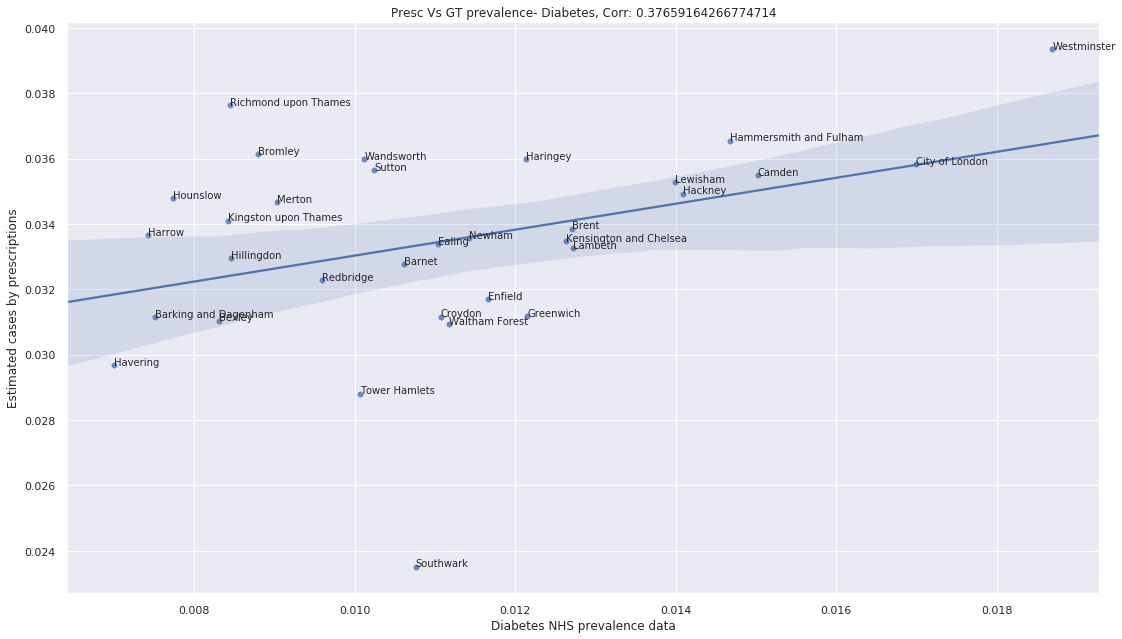

In [549]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x=gt , y = predict)
ax = plt.gca()
# gt_ , predict_ , names_ = filterHighestResiduals(gt, predict , names, 10)
label_point(gt , predict , names , ax)
ax.set_title("Presc Vs GT prevalence- Diabetes, Corr: " + str(corr[0]) )
ax.set_xlabel("Diabetes NHS prevalence data")
ax.set_ylabel("Estimated cases by prescriptions",)